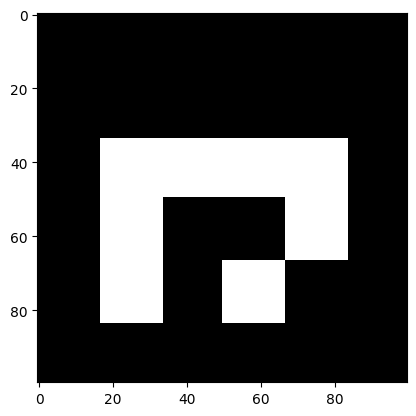

In [17]:
from cv2 import aruco
import cv2
import matplotlib.pyplot as plt
import os

# ArUco辞書の生成
dict_aruco = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)

# IDを指定 (適当な整数)
marker_id = 1

# マーカーサイズ
size_mark = 100

# 画像の作成
img = aruco.generateImageMarker(dict_aruco, marker_id, size_mark)

# フォルダ名
folder_name = "marker-images"

# フォルダが存在しない場合は作成
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# 画像の保存
file_name = f"{folder_name}/marker_{marker_id}.png"
cv2.imwrite(file_name, img)

# 画像の表示
plt.imshow(img, cmap='gray')
plt.show()


In [4]:
### マーカーIDと、動画を重ねて表示する
import cv2
from cv2 import aruco
import time

### --- aruco設定 --- ###
dict_aruco = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
parameters = aruco.DetectorParameters()

cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, dict_aruco, parameters=parameters)

        frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
        cv2.imshow('frame', frame_markers)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyWindow('frame')
    cap.release()
except KeyboardInterrupt:
    cv2.destroyWindow('frame')
    cap.release()

In [25]:
import cv2
from cv2 import aruco
import numpy as np

# ARマーカー設定
dict_aruco = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
parameters = aruco.DetectorParameters()

cap = cv2.VideoCapture(1)

# センサーデータの初期値
acceleration_data = {'x': 0, 'y': 0, 'z': 0}

def update_acceleration_data():
    # 仮のセンサーデータ更新ロジック
    # 実際にはデバイスのセンサーデータを使用する
    acceleration_data['x'] += 0.1
    acceleration_data['y'] += 0.05
    acceleration_data['z'] += 0.02

try:
    while True:
        ret, frame = cap.read()

        # カラー画像をHSVに変換し、明度のみを用いてグレースケールに変換
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        gray = hsv[:,:,2]

        # ARマーカー検出
        corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, dict_aruco, parameters=parameters)
        frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

        # センサーデータの更新
        update_acceleration_data()

        if ids is not None:
            for i in range(len(ids)):
                marker_id = ids[i]
                marker_corners = corners[i][0]

                # マーカー座標の表示
                text = f"AR Marker ID: {marker_id}, Marker Coordinates: {marker_corners}"
                cv2.putText(frame_markers, text, (10, 30 + i * 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # 画像表示
        cv2.imshow('AR with Acceleration', frame_markers)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyWindow('AR with Acceleration')
    cap.release()
except KeyboardInterrupt:
    cv2.destroyWindow('AR with Acceleration')
    cap.release()


In [5]:
import cv2
from cv2 import aruco
import numpy as np

def get_mark_coordinate(cap, dict_aruco, parameters, num_id):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, dict_aruco, parameters=parameters)
    parameters.minDistanceToBorder = 10 

    if ids is not None and num_id in ids:
        index = np.where(ids == num_id)[0][0]
        cornerUL = corners[index][0][0]
        cornerUR = corners[index][0][1]
        cornerBR = corners[index][0][2]
        cornerBL = corners[index][0][3]

        center = [(cornerUL[0] + cornerBR[0]) / 2, (cornerUL[1] + cornerBR[1]) / 2]

        # Draw coordinates on the frame
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, f'ID: {num_id}', (int(center[0]), int(center[1])), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        cv2.putText(frame, f'Coord: ({center[0]:.2f}, {center[1]:.2f})', (10, 30), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        cv2.imshow('Camera Window', frame)

        return center

    # If ID is not found, display the original frame
    cv2.imshow('Camera Window', frame)

    return None

cameraID = 0
cap = cv2.VideoCapture(cameraID)
dict_aruco = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
parameters = aruco.DetectorParameters()

markID = 5

try:
    while True:
        print(' ----- get_mark_coordinate ----- ')
        print(get_mark_coordinate(cap, dict_aruco, parameters, markID))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
except KeyboardInterrupt:
    cap.release()

cv2.destroyAllWindows()


 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinate ----- 
None
 ----- get_mark_coordinat

In [3]:
import cv2
from cv2 import aruco
import numpy as np
import serial
def get_mark_coordinate(cap, dict_aruco, parameters, num_id):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, dict_aruco, parameters=parameters)

    if ids is not None and num_id in ids:
        index = np.where(ids == num_id)[0][0]
        cornerUL = corners[index][0][0]
        cornerUR = corners[index][0][1]
        cornerBR = corners[index][0][2]
        cornerBL = corners[index][0][3]

        center = [(cornerUL[0] + cornerBR[0]) / 2, (cornerUL[1] + cornerBR[1]) / 2]

        # Draw coordinates on the frame
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, f'ID: {num_id}', (int(center[0]), int(center[1])), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        cv2.putText(frame, f'Coord: ({center[0]:.2f}, {center[1]:.2f})', (10, 30), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        cv2.imshow('Camera Window', frame)

        return center

    # If ID is not found, display the original frame
    cv2.imshow('Camera Window', frame)

    return None

def send_command_and_wait(ser, cap, command, expected_response):
    while True:
        if command != "none":
            ser.write((command + '\n').encode())

        # Keep capturing frames to avoid stopping camera
        cap.grab()

        response = ser.readline().decode().strip()
        if response == expected_response:
            print("Arduino Response:", response)
            break

cameraID = 0
cap = cv2.VideoCapture(cameraID)
dict_aruco = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
parameters = aruco.DetectorParameters()

markID = 5

# Arduinoとのシリアル通信設定
arduino_port = 'COM4'  # Arduinoのポートに合わせて変更
arduino_baudrate = 115200
ser = serial.Serial(arduino_port, arduino_baudrate, timeout=1)

try:
    send_command_and_wait(ser, cap, 'serial_connecting', 'serial_connected')

    # Rest of the code
    while True:
        print(' ----- get_mark_coordinate ----- ')
        print(get_mark_coordinate(cap, dict_aruco, parameters, markID))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    cap.release()

cv2.destroyAllWindows()


Arduino Response: serial_connected
 ----- get_mark_coordinate ----- 
[348.5, 180.0]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[349.0, 180.0]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 
[348.5, 180.5]
 ----- get_mark_coordinate ----- 


In [5]:
import cv2
from cv2 import aruco
import numpy as np

def get_mark_coordinate(cap, dict_aruco, parameters, num_id):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, dict_aruco, parameters=parameters)

    if ids is not None and num_id in ids:
        index = np.where(ids == num_id)[0][0]
        cornerUL = corners[index][0][0]
        cornerUR = corners[index][0][1]
        cornerBR = corners[index][0][2]
        cornerBL = corners[index][0][3]

        center = [(cornerUL[0] + cornerBR[0]) / 2, (cornerUL[1] + cornerBR[1]) / 2]

        # Draw coordinates on the frame
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = f'ID: {num_id}'
        text_size = cv2.getTextSize(text, font, 0.5, 1)[0]
        
        # Draw a white rectangle as background for the text
        cv2.rectangle(frame, (int(center[0] - text_size[0]/2 - 5), int(center[1] - text_size[1]/2 - 5)),
                      (int(center[0] + text_size[0]/2 + 5), int(center[1] + text_size[1]/2 + 5)), (255, 255, 255), -1)
        
        # Draw the text on the white background
        cv2.putText(frame, text, (int(center[0] - text_size[0]/2), int(center[1] + text_size[1]/4)), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        # Get the image center coordinates
        height, width, _ = frame.shape
        image_center = (width // 2, height // 2)

        # Draw the image center
        cv2.circle(frame, image_center, 5, (255, 255, 255), -1)

        # Draw line from marker to image center
        cv2.line(frame, (int(center[0]), int(center[1])), image_center, (255, 255, 255), 2)

        # Convert coordinates to center-based coordinate system
        center_based_coords = (int(center[0]) - image_center[0], int(center[1]) - image_center[1])
        
        # Display converted coordinates with background
        cv2.rectangle(frame, (10, 40), (250, 80), (255, 255, 255), -1)
        cv2.putText(frame, f'Converted Coord: {center_based_coords}', (10, 60), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

    # Display the frame with markers
    cv2.imshow('Camera Window', frame)

    return center_based_coords if ids is not None and num_id in ids else None

# カメラの初期化
cameraID = 0
cap = cv2.VideoCapture(cameraID)

# アルーコ辞書の初期化
dict_aruco = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)

# アルーコ検出のパラメータの初期化
parameters = aruco.DetectorParameters()

# アルーコマーカのID
markID = 5

while cap.isOpened():
    # アルーコマーカの位置を取得
    coordinates = get_mark_coordinate(cap, dict_aruco, parameters, markID)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
from cv2 import aruco
import numpy as np
import time

def calculate_speed(prev_coords, current_coords, elapsed_time):
    delta_x = current_coords[0] - prev_coords[0]
    delta_y = current_coords[1] - prev_coords[1]

    speed_x = delta_x / elapsed_time
    speed_y = delta_y / elapsed_time

    return speed_x, speed_y

def get_mark_coordinate(cap, dict_aruco, parameters, num_id):
    start_time = time.time()
    prev_coords = None

    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, dict_aruco, parameters=parameters)

        if ids is not None and num_id in ids:
            index = np.where(ids == num_id)[0][0]
            cornerUL = corners[index][0][0]
            cornerBR = corners[index][0][2]

            center = [(cornerUL[0] + cornerBR[0]) / 2, (cornerUL[1] + cornerBR[1]) / 2]

            # Convert coordinates to center-based coordinate system
            height, width, _ = frame.shape
            image_center = (width // 2, height // 2)
            center_based_coords = (int(center[0]) - image_center[0], int(center[1]) - image_center[1])

            # Display converted coordinates with background
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.rectangle(frame, (10, 40), (250, 80), (255, 255, 255), -1)
            cv2.putText(frame, f'Converted Coord: {center_based_coords}', (10, 60), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

            # Calculate speed
            current_time = time.time()
            elapsed_time = current_time - start_time

            if prev_coords is not None:
                speed_x, speed_y = calculate_speed(prev_coords, center_based_coords, elapsed_time)
                print(f"Speed X: {speed_x} px/s, Speed Y: {speed_y} px/s")

            prev_coords = center_based_coords
            start_time = current_time

        # Display the frame with markers
        cv2.imshow('Camera Window', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# カメラの初期化
cameraID = 0
cap = cv2.VideoCapture(cameraID)

# アルーコ辞書の初期化
dict_aruco = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)

# アルーコ検出のパラメータの初期化
parameters = aruco.DetectorParameters()

# アルーコマーカのID
markID = 5

# アルーコマーカの速度を計測
get_mark_coordinate(cap, dict_aruco, parameters, markID)

cap.release()
cv2.destroyAllWindows()


Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: -33.99776282726757 px/s, Speed Y: 0.0 px/s
Speed X: 29.587150203511545 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: 0.0 px/s, Speed Y: 0.0 px/s
Speed X: